# Portfolio diversification with varying investor abilities

N. James and M. Menzies

[Link to paper](https://arxiv.org/pdf/2311.06519.pdf)

## Inspirations

 * We acknowledge portfolio optimisation as a difficult procedure, especially over non-convex sets.
 * We consider a growing body of work that it is frequently difficult to beat equally weighted portfolios.
 * We address the idea of “investor skill,” where we study the optimal cardinality of portfolios for investors with varying levels of success in picking “winning” securities.

> "We specifically investigate two aspects of portfolio selection: what the distribution of portfolio outcomes looks like across different cardinalities k and different levels of investor skill."

## Optimization Assumptions

 * Risk free rate: $R_f = 0$
 * Equally weighted portfolios with size $k$: $w_i = \frac{1}{k}$
 * Each year contains the same period of trading days: $P = 252$

## Data

The authors use 370 US equities from S&P500 with at least 20 years of history, and separate each dataset into one-year periods. We will use 309 S&P500 equities with the same history length.

In [178]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tqdm
import yfinance as yf

In [169]:
sns.set_theme()

In [53]:
equity_data = pd.read_csv("./files/equity.csv", index_col=0)
equity_data.head()

,A,AA,AAPL,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WMB,WMT,WY,X,XEL,XOM,XRAY,XRX,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,43.757736,70.691589,0.847207,9.081110,16.274670,28.572292,6.473895,24.924671,8.052908,10.770648,...,9.498190,43.555931,11.621569,23.991533,7.112461,18.499037,6.695474,36.800503,4.703721,36.146141
2000-01-04,40.415142,71.019104,0.775779,8.821651,14.909401,27.126852,6.406455,24.924671,7.660816,10.770648,...,9.287542,41.926174,11.184974,23.095974,7.276233,18.144711,6.695474,35.088840,4.609175,34.395828
2000-01-05,37.908195,75.113220,0.787131,8.805430,15.204175,27.522856,6.305304,24.685013,7.178246,11.187303,...,9.862027,41.070515,11.777483,23.331652,7.556982,19.133884,6.811221,36.895588,4.632809,34.355137
2000-01-06,36.464787,74.130623,0.719014,9.113539,15.328292,26.770428,6.339020,25.014551,6.740914,11.145638,...,10.072677,41.518700,12.328423,23.473057,7.486801,20.123055,6.820127,36.134842,4.593416,34.843594
2000-01-07,39.503517,73.912254,0.753073,9.210842,16.072979,27.522856,6.440175,25.583738,7.540173,11.312298,...,10.340772,44.656055,11.923018,24.085800,7.486801,20.063992,6.802317,36.990673,4.490990,34.924999


In [96]:
yearly_data = {}

for year in range(2001, 2024):
    idx = (f'{year - 1}-01-01' <= equity_data.index) & (equity_data.index < f'{year}-01-01')
    yearly_data[f"{year - 1}"] = equity_data[idx]

In [64]:
equity_names = list(equity_data.columns.values)
P = 252
Rf = 0
K = range(10, 101)
sample_portfolios = 1000

In [189]:
yearly_10_percs = {}
yearly_50_percs = {}
yearly_90_percs = {}

for y in range(2000, 2023):
    ydata = yearly_data[f"{y}"]
    perc_10_sr = []
    perc_50_sr = []
    perc_90_sr = []
    for k in tqdm.tqdm(K):
        weights = np.ones(k) / k
        portfolios = [list(np.random.choice(equity_names, size=k, replace=False)) for _ in range(sample_portfolios)]
        sharpe_ratios = []
        for portfolio in portfolios:
            portfolio_rets = ydata.loc[:, portfolio].pct_change().dropna()
            er = portfolio_rets.values.dot(weights).mean() * 252
            sigma = (weights.dot(portfolio_rets.cov().values).dot(weights))**0.5 * (252 ** 0.5)
            sharpe_ratios.append(er / sigma)
        perc_10_sr.append(np.percentile(sharpe_ratios, 10))
        perc_50_sr.append(np.percentile(sharpe_ratios, 50))
        perc_90_sr.append(np.percentile(sharpe_ratios, 90))
    yearly_10_percs[f"{y}"] = perc_10_sr
    yearly_50_percs[f"{y}"] = perc_50_sr
    yearly_90_percs[f"{y}"] = perc_90_sr
    print(f"Finished year {y}.")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [01:56<00:00,  1.28s/it]


Finished year 2000.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [02:02<00:00,  1.35s/it]


Finished year 2001.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [01:59<00:00,  1.31s/it]


Finished year 2002.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [01:58<00:00,  1.30s/it]


Finished year 2003.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [01:59<00:00,  1.31s/it]


Finished year 2004.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [02:05<00:00,  1.38s/it]


Finished year 2005.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [01:58<00:00,  1.30s/it]


Finished year 2006.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [02:03<00:00,  1.36s/it]


Finished year 2007.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [02:14<00:00,  1.47s/it]


Finished year 2008.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [01:50<00:00,  1.22s/it]


Finished year 2009.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [01:53<00:00,  1.25s/it]


Finished year 2010.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [01:58<00:00,  1.31s/it]


Finished year 2011.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [01:52<00:00,  1.23s/it]


Finished year 2012.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [01:57<00:00,  1.29s/it]


Finished year 2013.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [01:57<00:00,  1.29s/it]


Finished year 2014.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [01:52<00:00,  1.23s/it]


Finished year 2015.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [01:50<00:00,  1.22s/it]


Finished year 2016.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [01:53<00:00,  1.25s/it]


Finished year 2017.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [02:02<00:00,  1.35s/it]


Finished year 2018.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [01:52<00:00,  1.24s/it]


Finished year 2019.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [02:00<00:00,  1.33s/it]


Finished year 2020.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [01:57<00:00,  1.29s/it]


Finished year 2021.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [02:29<00:00,  1.64s/it]

Finished year 2022.


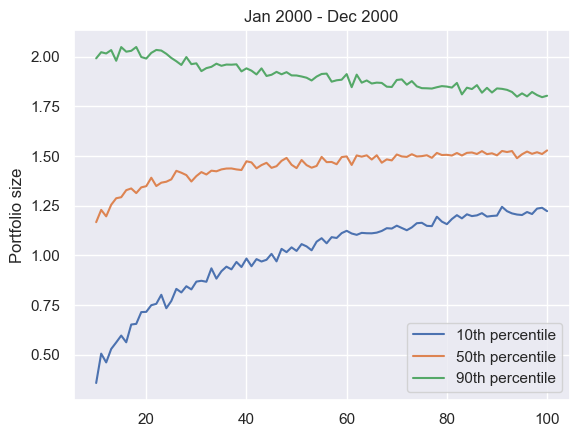

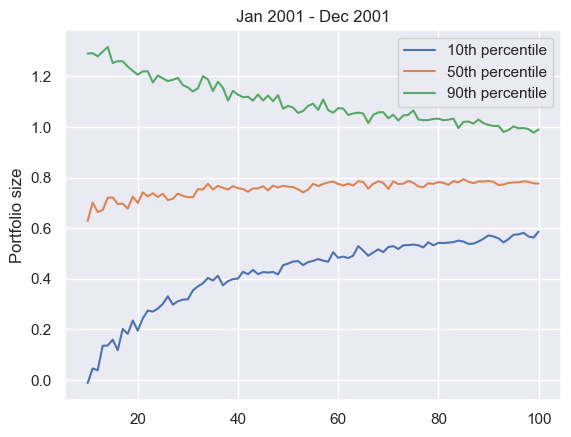

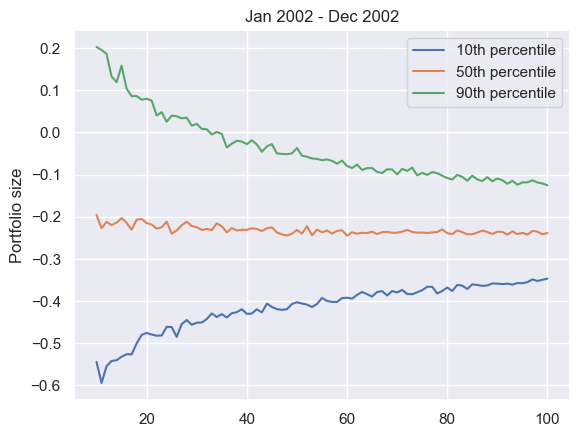

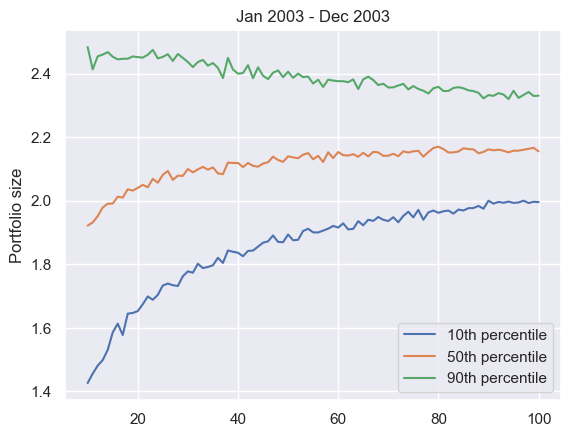

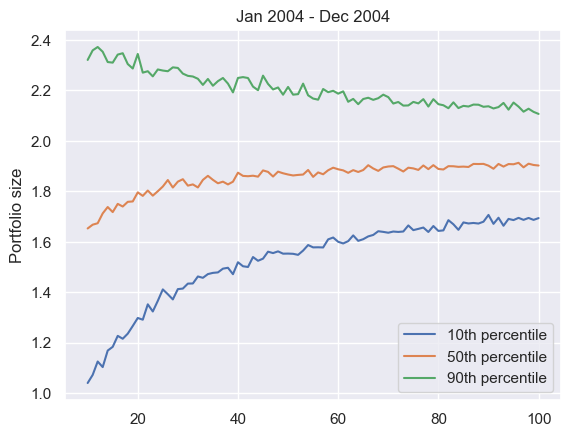

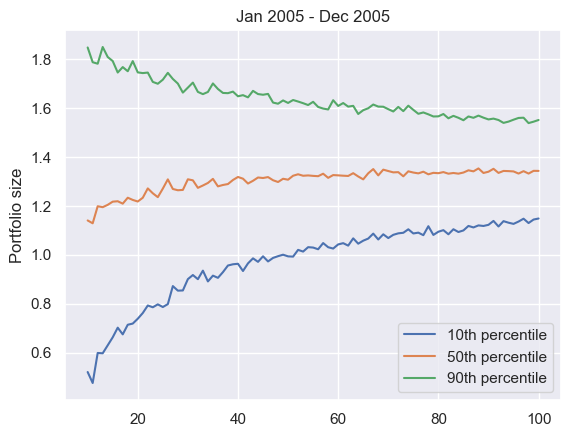

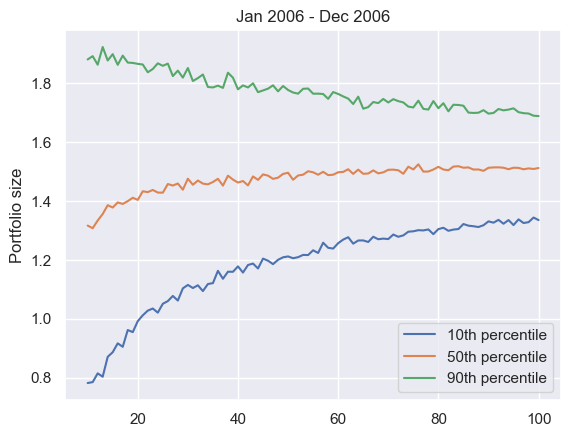

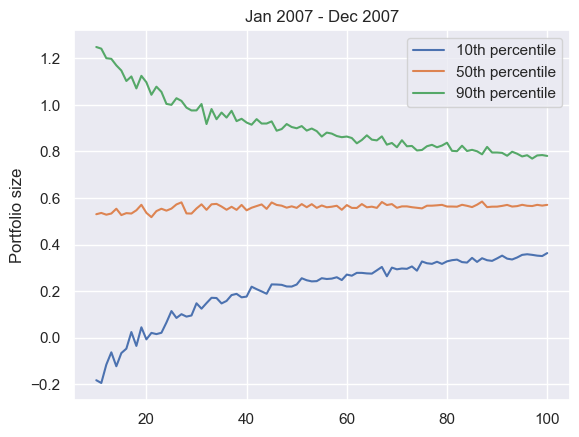

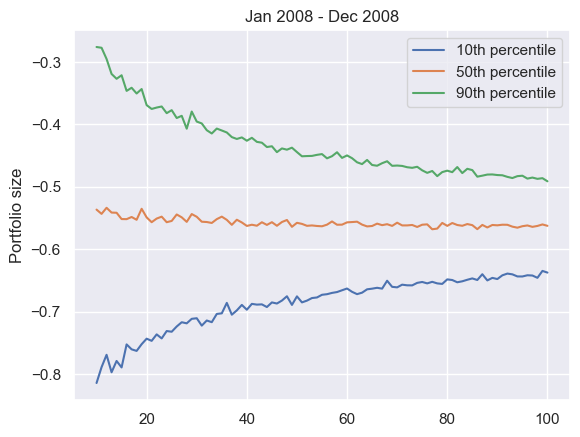

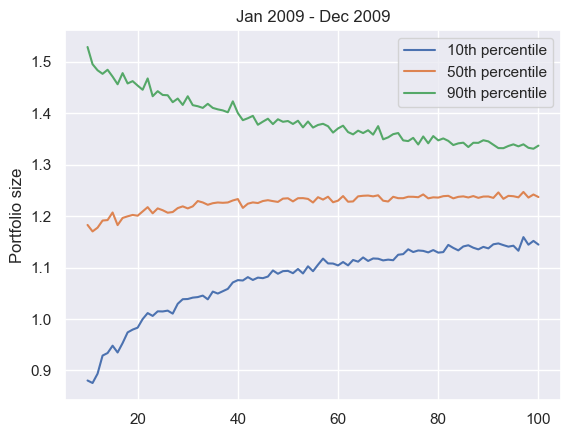

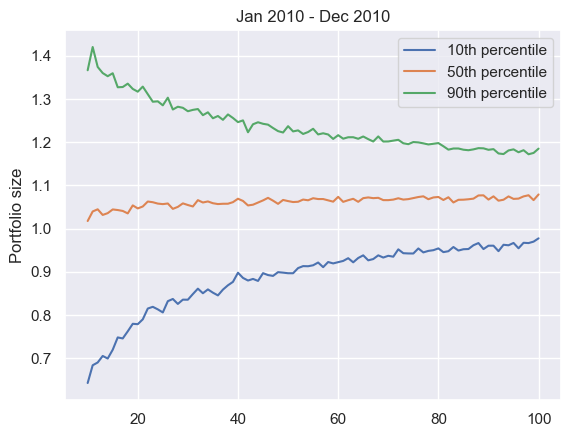

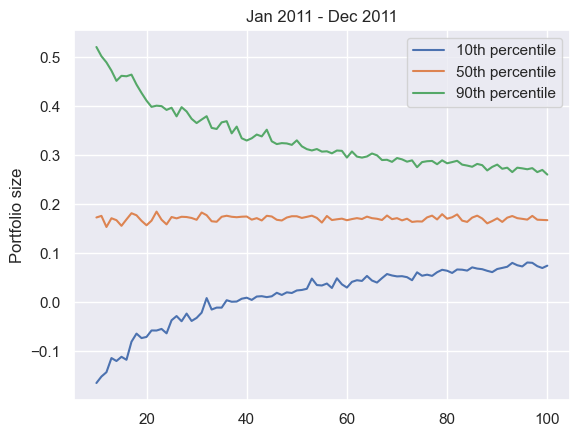

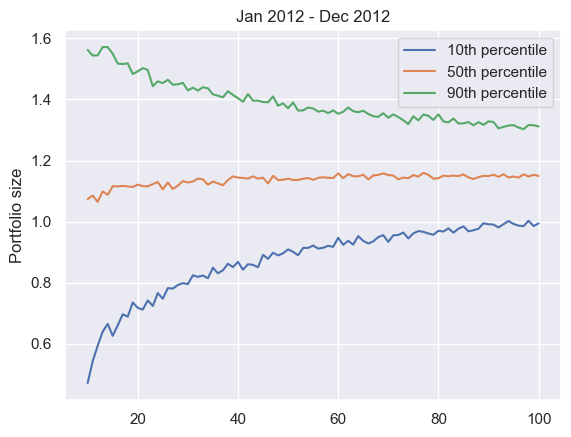

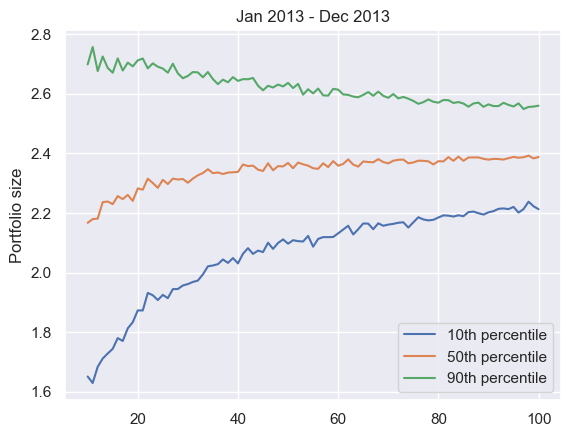

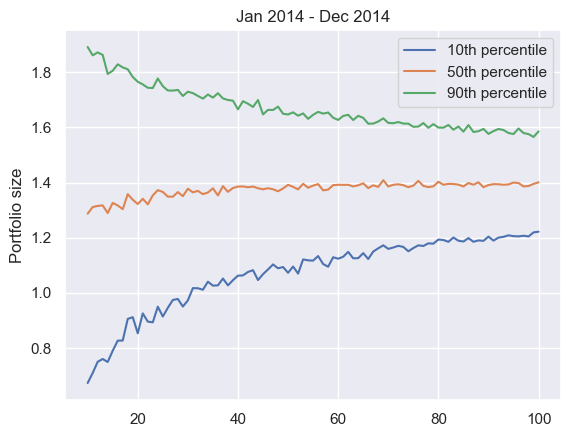

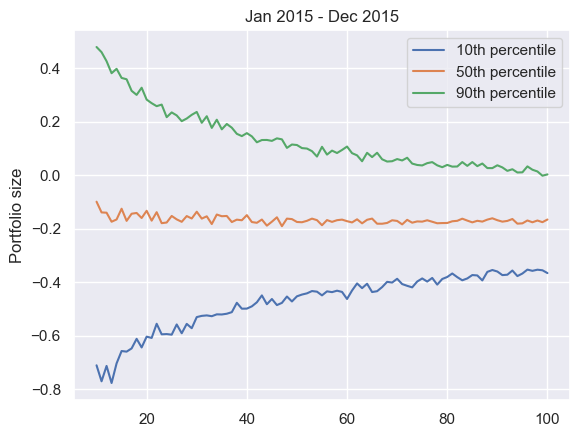

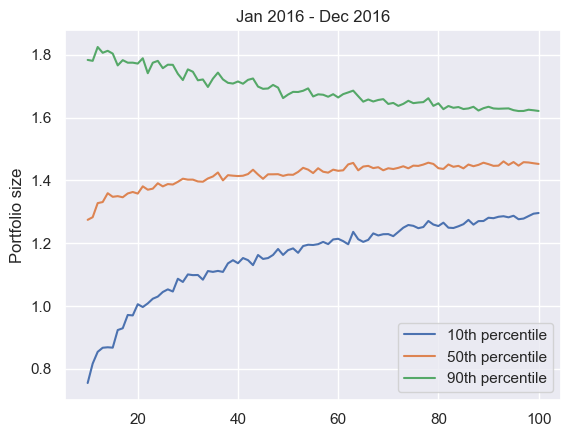

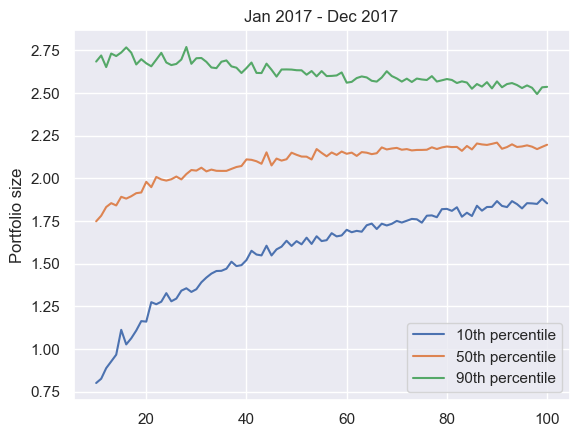

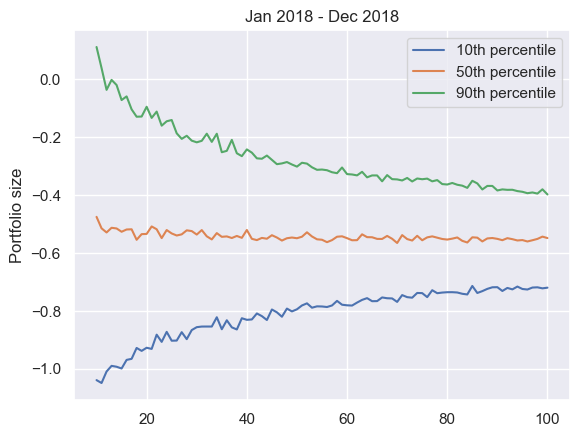

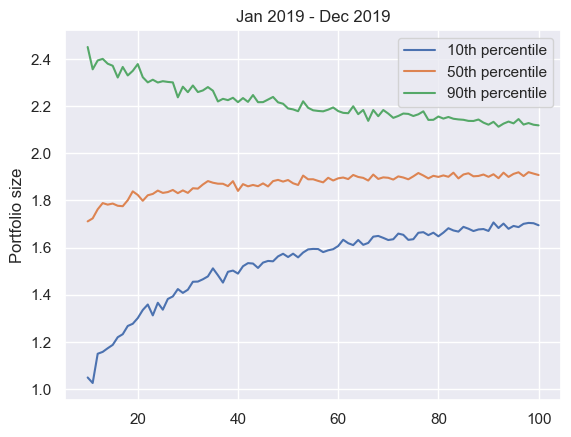

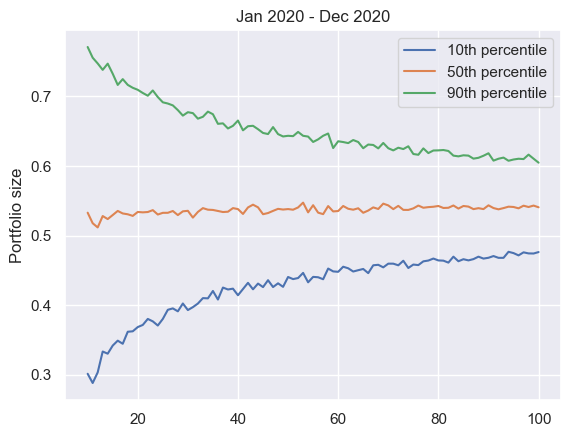

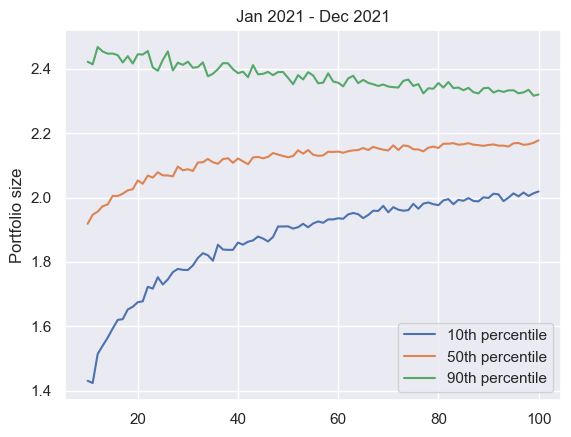

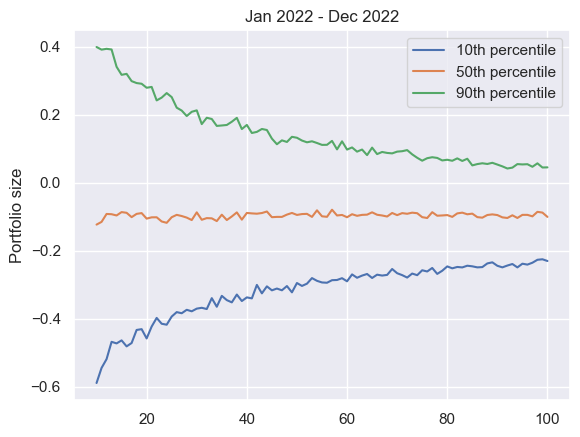

In [190]:
for y in range(2000, 2023):
    plt.title(f"Jan {y} - Dec {y}")
    plt.plot(K, yearly_10_percs[f"{y}"], label="10th percentile")
    plt.plot(K, yearly_50_percs[f"{y}"], label="50th percentile")
    plt.plot(K, yearly_90_percs[f"{y}"], label="90th percentile")
    plt.legend()
    plt.ylabel("Sharpe ratio")
    plt.ylabel("Portfolio size")
    plt.show()